In [1]:
# Connect with google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Package included remove package that should not be include
import keras
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet,ResNet101,InceptionV3,VGG16,VGG19, DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Call dataset 

# ************************Change dataset path*************************
DATADIR = "/content/drive/MyDrive/Freelance_Portfolio/asyraf/dataset GO for atomizer 3"
CATEGORIES = os.listdir(DATADIR)

# Pre-processing
#baca image dalam each folder n labelkan
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  # create path to CATEGORIES
    for img in os.listdir(path):  # iterate over each image per CATEGORIES
        img_array = cv2.imread(os.path.join(path,img))  # convert to array ,cv2.IMREAD_GRAYSCALE
        break  # we just want one for now so break
    break 

training_data = []

#preprocess data
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img)) # convert to array
            new_array = cv2.resize(img_array, (32, 32))  # ubah size image dekat 32
            training_data.append([new_array, class_num])  # add this to our training_data

create_training_data()

print(len(training_data))


100%|██████████| 330/330 [00:12<00:00, 27.03it/s]

986


In [4]:
# Split dataset 80:20 ratio 
import tensorflow as tf
from sklearn.model_selection import train_test_split
X = []
y = []
 
for features,label in training_data:
    X.append(features)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42, shuffle=True)
 
x_train = np.asarray(X_train,dtype=np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3, dtype='float32')
x_test2 = np.asarray(X_test,dtype=np.float32)/255.0
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=3, dtype='float32')

# Training using Transfer Learning
# choose suitable transfer learning
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3)) # tukar cnn model yg kamu nk dengan tukar size image dekat 32

# Classification layer for vgg
x=base_model.output
x=Flatten()(x)
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation change based on class

#padam " klu nk guna
"""
# choose suitable transfer learning
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(32,32,3)) # tukar cnn model yg kamu nk dengan tukar size image dekat 32

# Classification layer for mobilenet
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dropout(0.5)(x)
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation change based on class
"""

model=Model(inputs=base_model.input,outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
history = model.fit(x_train,y_train,validation_data=(x_test2,y_test2),batch_size=32,epochs=50)
score=model.evaluate(x_test2,y_test2,verbose=0)
print("accuracy = ",score[1])

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/50
25/25 [==============================] - 15s 131ms/step - loss: 1.1561 - accuracy: 0.3426 - val_loss: 1.1805 - val_accuracy: 0.3333
Epoch 2/50
25/25 [==============================] - 2s 67ms/step - loss: 1.0793 - accuracy: 0.3858 - val_loss: 1.1281 - val_accuracy: 0.3333
Epoch 3/50
25/25 [==============================] - 2s 64ms/step - loss: 1.0966 - accuracy: 0.3782 - val_loss: 1.1090 - val_accuracy: 0.3333
Epoch 4/50
25/25 [==============================] - 2s 63ms/step - loss: 1.0910 - accuracy: 0.3871 - val_loss: 1.0769 - val_accuracy: 0.3788
Epoch 5/50
25/25 [==============================] - 2s 63ms/step - loss: 0.9981 - accuracy: 0.4518 - val_loss: 1.4820 - val_accuracy: 0.3333
Epoch 6/50
25/25 [==============================] - 2s 63ms/step - loss: 0.9662 - accuracy: 0.4848 - val_loss: 0.7690 - val_accuracy: 0.5960
Epoch 7/50
25/25 [==============================] - 2s 63ms/step - loss: 0.9548 - accur

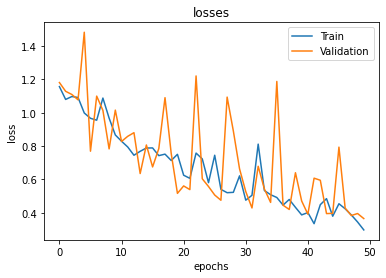

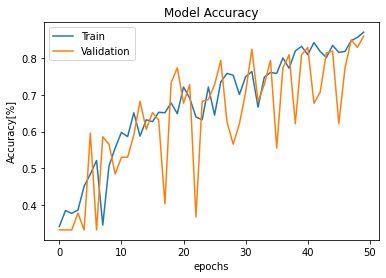

In [5]:
#plot the performance of the project
plt.plot(history.history['loss'], label = "Train") 
plt.plot(history.history['val_loss'], label = "Validation")
plt.title("losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Validation") 
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy[%]")
plt.legend()
plt.show()